C:\Users\Utente\AppData\Local\Temp\ipykernel_62972\3664811995.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '203.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python (CPU time)', dim] = total_time
C:\Users\Utente\AppData\Local\Temp\ipykernel_62972\3664811995.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18343.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python (CPU time)', dim] = total_time
C:\Users\Utente\AppData\Local\Temp\ipykernel_62972\3664811995.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '185843.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc['Python (CPU time)', dim] = total_time


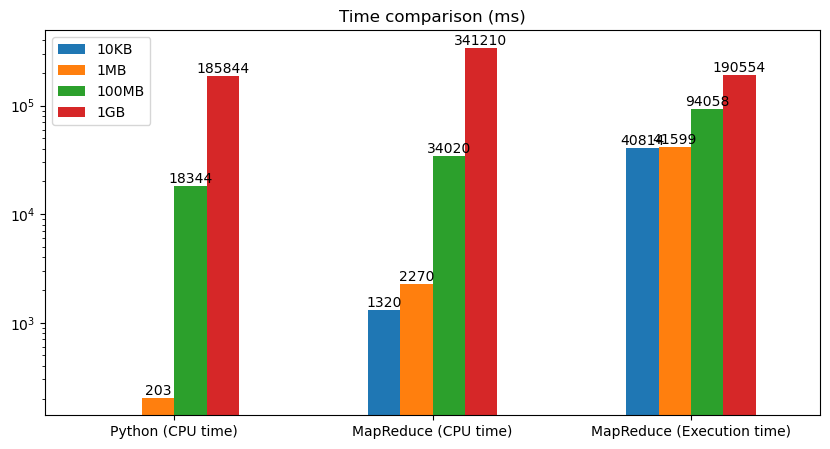

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from datetime import datetime
sys.path.insert(1, '../python')
from letterFrequency import process_file

run_id = 10
file_dims = ['10KB', '1MB', '100MB', '1GB']
df = pd.DataFrame(index=['Python (CPU time)', 'MapReduce (CPU time)', 'MapReduce (Execution time)'], columns=file_dims)
df = df.fillna(0)

for dim in file_dims:
    total_time = process_file(dim)
    df.loc['Python (CPU time)', dim] = total_time
    mr_file_path = f'../resources/performance_analysis/output_{run_id}/inmappercombiner_1/{dim}/log.txt'
    is_total_count = True
    time = 0
    with open(mr_file_path, 'r') as file:
        for line in file:
            if 'CPU time spent (ms)' in line:
                line = line.split('=')
                df.loc['MapReduce (CPU time)', dim] = float(line[1].strip())
            elif 'client.RMProxy' in line and is_total_count:
                dt = datetime.strptime(' '.join(line.split(' ')[:2]), "%Y-%m-%d %H:%M:%S,%f")
                time = int(dt.timestamp() * 1000)
            elif 'completed successfully' in line:
                if is_total_count:
                    is_total_count = False
                    continue
                dt = datetime.strptime(' '.join(line.split(' ')[:2]), "%Y-%m-%d %H:%M:%S,%f")
                time = int(dt.timestamp() * 1000) - time
                df.loc['MapReduce (Execution time)', dim] = time

ax = df.plot(kind='bar', figsize=(10, 5), title='Time comparison (ms)', rot=0)
ax.set_yscale('log')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()